In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser

%matplotlib inline
plt.rcParams['figure.figsize'] = np.array([10,6.180])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [ ]:
sys.path.insert(0, '/Users/weilu/Research/opt_server/')
from pyCodeLib import *

In [6]:
mj_matrix = pd.read_table("/Users/weilu/Dropbox/gxxxg/mj_matrix.txt", sep="\s+")

In [15]:
mj_matrix = mj_matrix.drop("Name", axis=1)

In [22]:
res_list = mj_matrix.columns.to_list()[1:]
mj_matrix = mj_matrix.set_index("Type")
mj_matrix.values.shape

In [27]:
table = np.zeros((20, 20))
mj_table = mj_matrix.values
for i in range(20):
    for j in range(i, 20):
        table[j][i] = table[i][j] = mj_table[i][j]

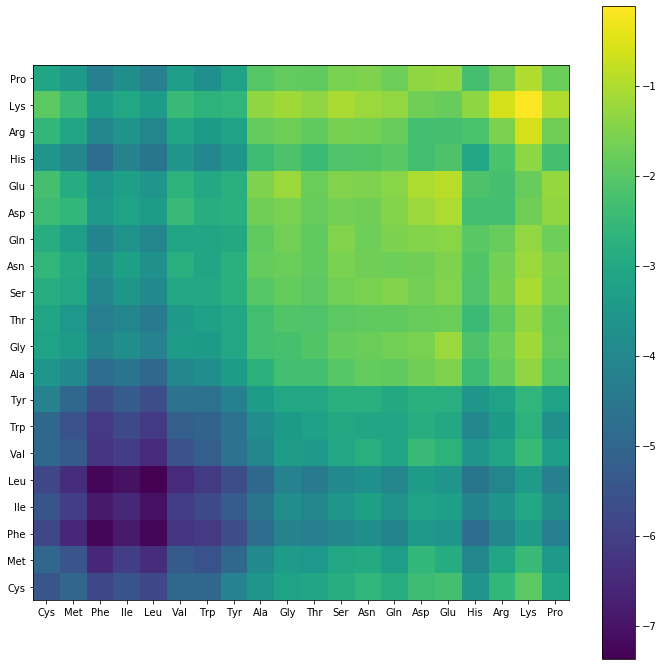

In [170]:
plt.imshow(table, origin=0)
_ = plt.xticks(range(20), res_list)
_ = plt.yticks(range(20), res_list)
plt.colorbar()

In [35]:
print(res_list)

['Cys', 'Met', 'Phe', 'Ile', 'Leu', 'Val', 'Trp', 'Tyr', 'Ala', 'Gly', 'Thr', 'Ser', 'Asn', 'Gln', 'Asp', 'Glu', 'His', 'Arg', 'Lys', 'Pro']


In [68]:
from Bio.PDB.Polypeptide import three_to_one

In [72]:
res_group = []
for res, group in zip(res_list, x_label):
    res_group.append([res, group])
    # print(res, group)
res_group.sort(key=lambda x:x[1])
for res, group in res_group:
    print(res, group, three_to_one(res.upper()))

Lys 0 K
Cys 1 C
Met 1 M
Val 1 V
Trp 1 W
Tyr 1 Y
Ala 2 A
Gly 2 G
Thr 2 T
His 2 H
Ser 3 S
Asn 3 N
Gln 3 Q
Asp 3 D
Glu 3 E
Arg 3 R
Pro 3 P
Phe 4 F
Ile 4 I
Leu 4 L


In [66]:
x_label

array([1, 1, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 0, 3],
      dtype=int32)

In [111]:
wang_label = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 4, 4, 4, 3, 3, 1, 4, 4, 2]

In [112]:
len(wang_label)

20

In [81]:
np.argsort(x_label)

array([18,  0,  1,  5,  6,  7, 16, 10,  9,  8, 11, 12, 13, 14, 15, 17, 19,
        4,  3,  2])

-21.047855833333337

score -21.141112380952375


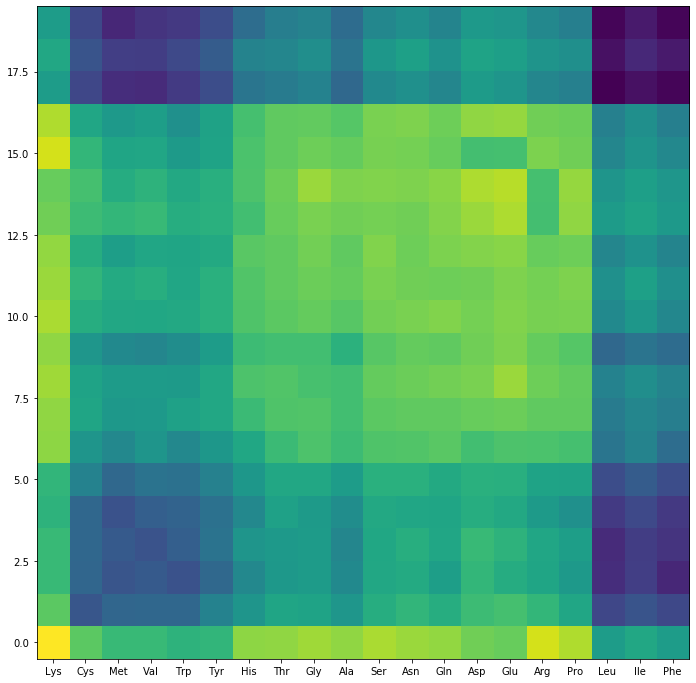

In [91]:
X = table
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=123).fit(X)
print("score", kmeans.score(X))
x_label = kmeans.predict(X)
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
# plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
plt.rcParams['figure.figsize'] = 4* np.array([3,3])    #golden ratio
t = table[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t, origin=0, aspect="equal")
_ = plt.xticks(pos_list, new_label)
# _ = plt.yticks(pos_list, new_label)
_ = plt.xticks(range(20), np.array(res_list)[np.argsort(x_label)])


In [221]:
from sklearn.decomposition import PCA
X = table
pca = PCA(n_components=2)
# pca.fit(X)
x_new = pca.fit_transform(X)

In [226]:
from sklearn.cluster import KMeans
X = x_new
kmeans = KMeans(n_clusters=5, random_state=123).fit(X)
print("score", kmeans.score(X))
x_label = kmeans.predict(X)

score -15.024582444957481


In [227]:
x_label

array([1, 1, 3, 3, 3, 1, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 0, 2],
      dtype=int32)

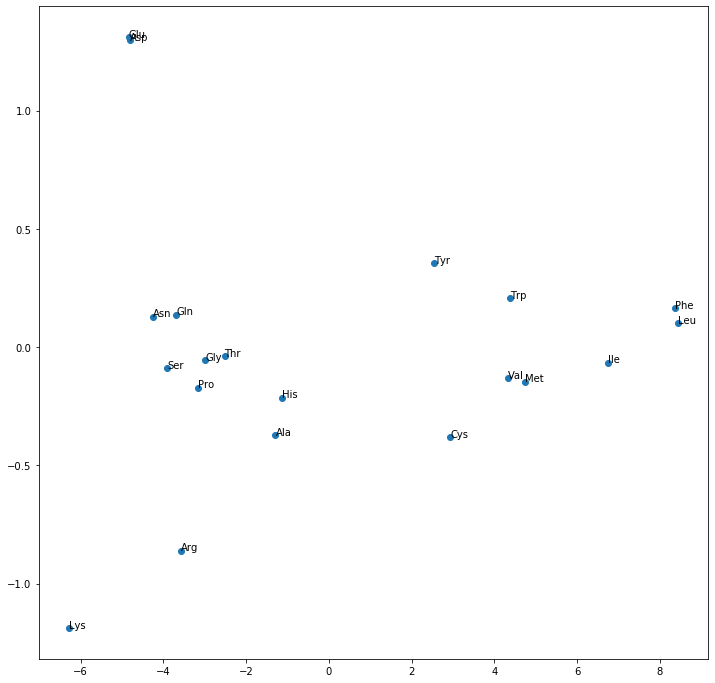

In [230]:
fig, ax = plt.subplots()
ax.scatter(x_new[:,0], x_new[:,1])

n = len(x_new[:,0])
for i in range(n):
    ax.annotate(res_list[i], (x_new[i,0], x_new[i,1]))

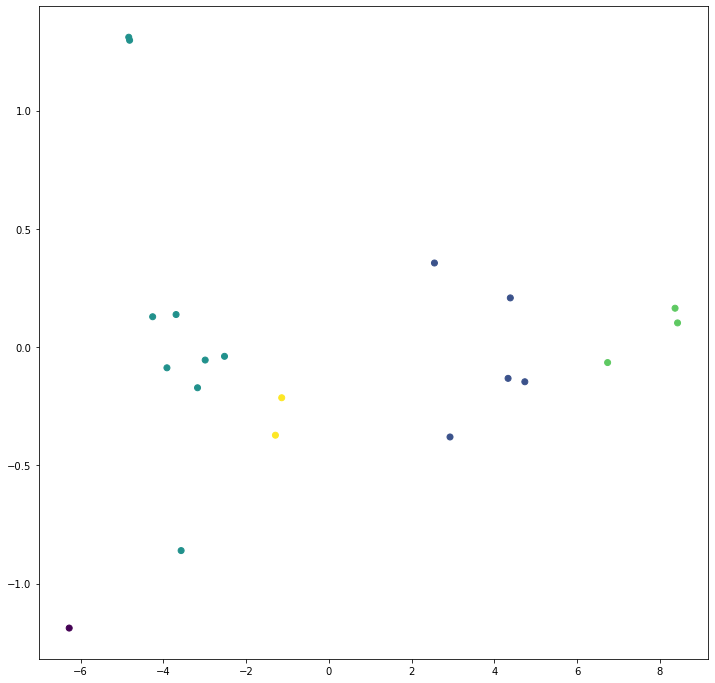

In [228]:
plt.scatter(x_new[:,0], x_new[:,1], c=x_label)

In [94]:
kmeans = KMeans(n_clusters=5, random_state=5123).fit(X)
print("score", kmeans.score(X))
x_label = kmeans.predict(X)

score -21.047855833333337


In [114]:
def compute_score(X, x_label):
    dis = 0
    for i in range(5):
        x_center = np.average(X[x_label==i], axis=0)
        dis += np.sum(np.sum((X[x_label==i] - x_center)**2, axis=1))
    return dis

In [117]:
compute_score(X, np.array(wang_label))

50.76193416666667

In [135]:
compute_score(X, np.random.randint(0, 5, size=20))

413.90431666666666

In [144]:
X = table
score_max = -100
from sklearn.cluster import KMeans
for i in range(50):
    kmeans = KMeans(n_clusters=5, random_state=i).fit(X)
    score = kmeans.score(X)
    print("score", score, i)
    if score > score_max:
        score_max = score
        keep_kmeans = kmeans

score -21.047855833333337 0
score -21.047855833333337 1
score -20.888549999999995 2
score -21.604187777777774 3
score -20.98311476190476 4
score -20.98311476190476 5
score -21.00261833333333 6
score -20.888549999999995 7
score -20.98311476190476 8
score -20.98311476190476 9
score -21.00261833333333 10
score -20.888549999999995 11
score -20.98311476190476 12
score -21.196543333333334 13
score -20.888549999999995 14
score -21.604187777777774 15
score -21.00261833333333 16
score -20.888549999999995 17
score -20.98311476190476 18
score -20.98311476190476 19
score -20.888549999999995 20
score -21.00261833333333 21
score -21.141112380952375 22
score -20.888549999999995 23
score -20.888549999999995 24
score -20.888549999999995 25
score -20.888549999999995 26
score -20.888549999999995 27
score -20.888549999999995 28
score -20.888549999999995 29
score -21.00261833333333 30
score -20.98311476190476 31
score -21.00261833333333 32
score -20.888549999999995 33
score -21.00261833333333 34
score -21.

In [145]:
keep_kmeans.score(X)

-20.888549999999995

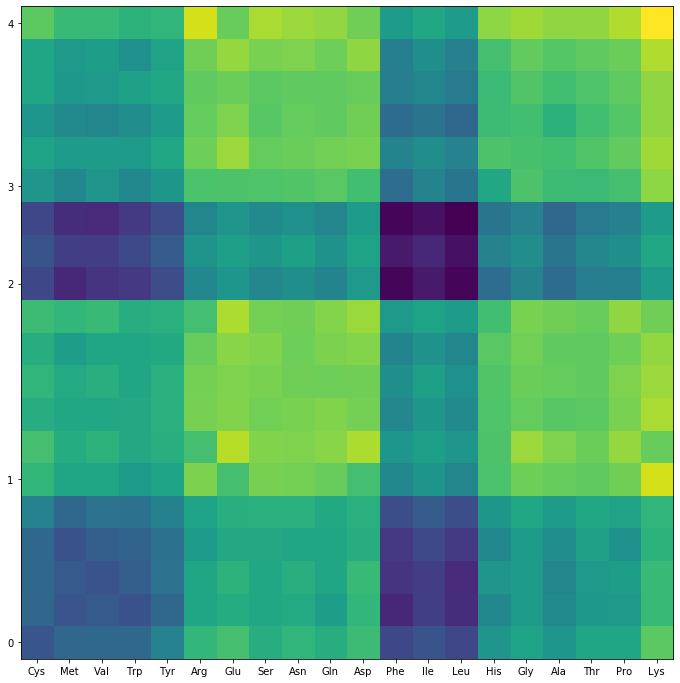

In [146]:
X = table
kmeans = keep_kmeans
x_label = kmeans.predict(X)
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
# plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
plt.rcParams['figure.figsize'] = 4* np.array([3,3])    #golden ratio
t = table[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t, origin=0, aspect="equal")
# _ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)
_ = plt.xticks(range(20), np.array(res_list)[np.argsort(x_label)])

score -21.047855833333337


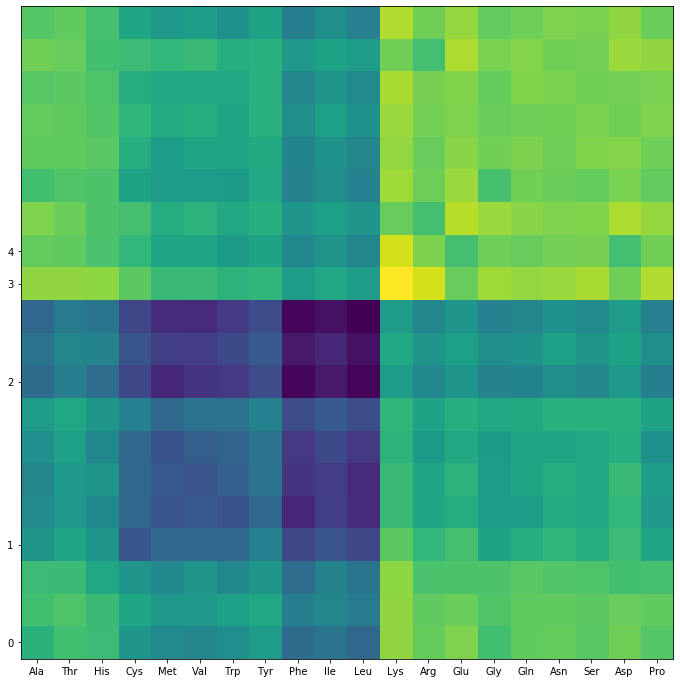

In [92]:
X = table
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=5123).fit(X)
print("score", kmeans.score(X))
x_label = kmeans.predict(X)
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
# plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
plt.rcParams['figure.figsize'] = 4* np.array([3,3])    #golden ratio
t = table[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t, origin=0, aspect="equal")
# _ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)
_ = plt.xticks(range(20), np.array(res_list)[np.argsort(x_label)])



In [ ]:
# affinity method is no good.

In [147]:
from sklearn.cluster import AffinityPropagation
AffinityPropagation()

In [151]:
af = AffinityPropagation(random_state=5123).fit(X)

In [152]:
res_group = []
x_label = af.predict(X)
for res, group in zip(res_list, x_label):
    res_group.append([res, group])
    # print(res, group)
res_group.sort(key=lambda x:x[1])
for res, group in res_group:
    print(res, group, three_to_one(res.upper()))

Phe 0 F
Ile 0 I
Leu 0 L
Cys 1 C
Met 1 M
Val 1 V
Trp 1 W
Tyr 1 Y
Ala 2 A
Gly 2 G
Thr 2 T
Ser 2 S
Asn 2 N
Gln 2 Q
Asp 2 D
Glu 2 E
His 2 H
Arg 2 R
Lys 2 K
Pro 2 P


In [191]:
distance = table
beta = 1
similarity = np.exp(-beta * distance)

In [192]:
similarity = similarity/ similarity.sum(axis=0).reshape(1, -1) / similarity.sum(axis=1).reshape(-1, 1)

In [231]:
similarity.sum(axis=1)

array([0.00057941, 0.0005244 , 0.0005256 , 0.00051199, 0.00050351,
       0.00051689, 0.00061881, 0.00070198, 0.00061925, 0.00080039,
       0.00080805, 0.00085419, 0.00096109, 0.0008039 , 0.00110323,
       0.00099039, 0.0007817 , 0.00091836, 0.00095171, 0.00071721])

In [232]:
similarity.sum(axis=0)

array([0.00057941, 0.0005244 , 0.0005256 , 0.00051199, 0.00050351,
       0.00051689, 0.00061881, 0.00070198, 0.00061925, 0.00080039,
       0.00080805, 0.00085419, 0.00096109, 0.0008039 , 0.00110323,
       0.00099039, 0.0007817 , 0.00091836, 0.00095171, 0.00071721])

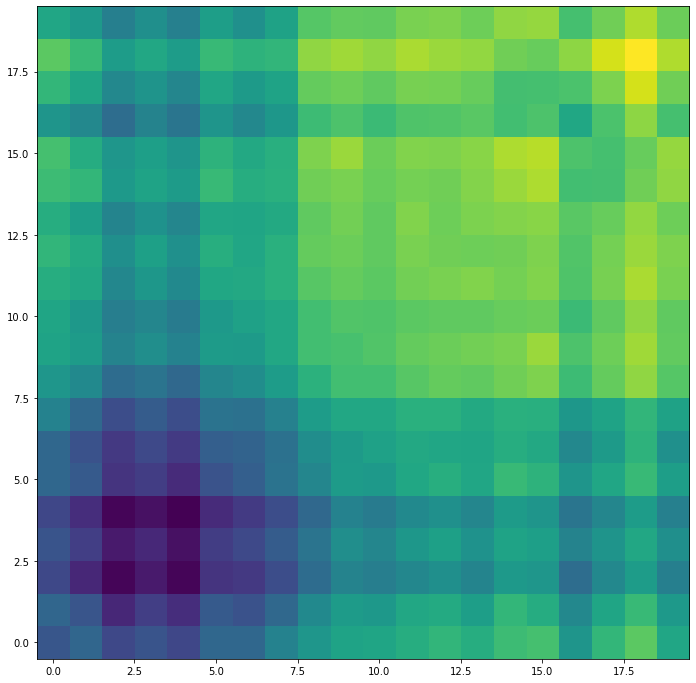

In [234]:
plt.imshow(table, origin=0)

In [195]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(5, affinity='precomputed', n_init=100,
                        assign_labels='discretize')
sc_label = sc.fit_predict(similarity)  

In [196]:
compute_score(X, np.array(sc_label))

146.79975499999998

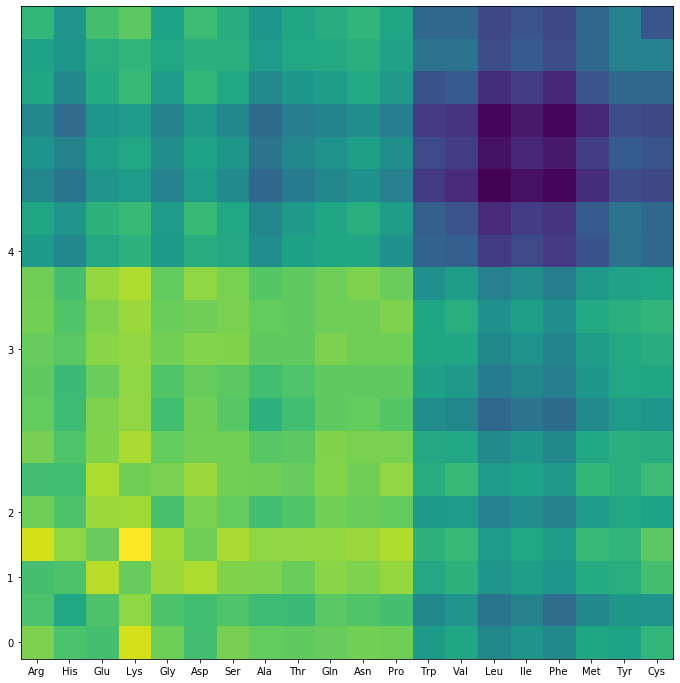

In [168]:
X = table

x_label = sc_label
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
# plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
plt.rcParams['figure.figsize'] = 4* np.array([3,3])    #golden ratio
t = table[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t, origin=0, aspect="equal")
# _ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)
_ = plt.xticks(range(20), np.array(res_list)[np.argsort(x_label)])




In [210]:
from sklearn.cluster import DBSCAN
X = table
db = DBSCAN(eps=1.8, min_samples=1).fit_predict(X)

In [211]:
db

array([0, 0, 1, 1, 1, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3])

In [212]:
compute_score(X, np.array(db))

29.901216666666663

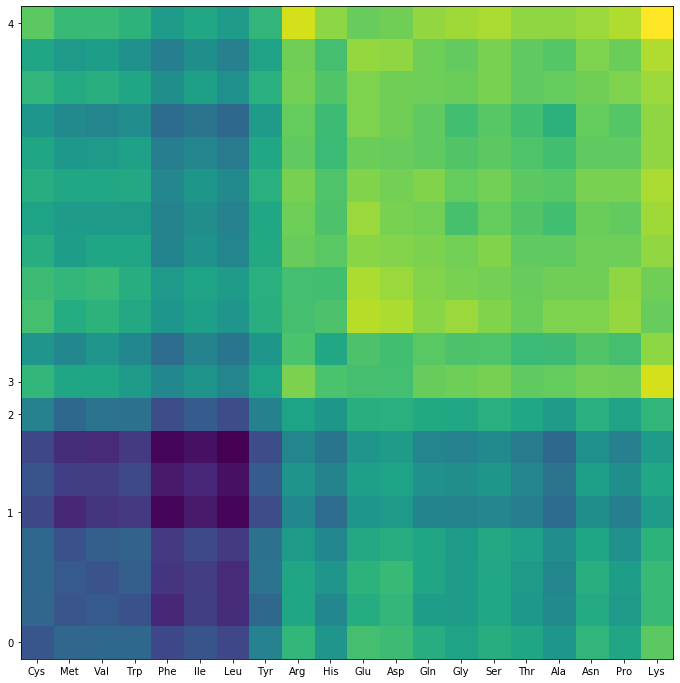

In [213]:
X = table

x_label = db
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
# plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
plt.rcParams['figure.figsize'] = 4* np.array([3,3])    #golden ratio
t = table[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t, origin=0, aspect="equal")
# _ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)
_ = plt.xticks(range(20), np.array(res_list)[np.argsort(x_label)])





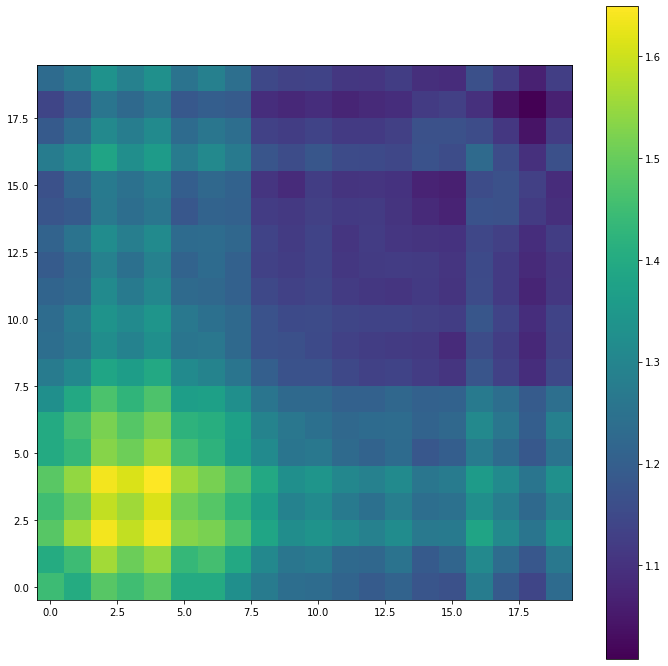

In [160]:
plt.imshow(similarity, origin=0)
plt.colorbar()

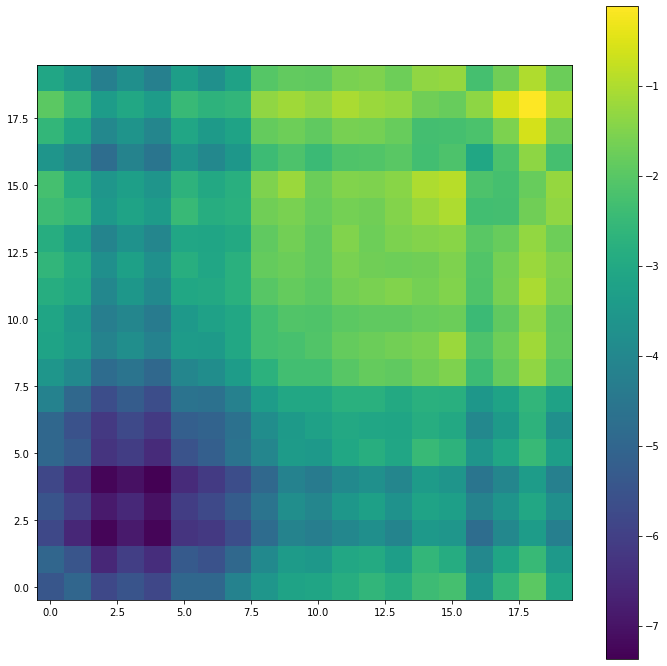

In [169]:
plt.imshow(table, origin=0)
plt.colorbar()

In [3]:
b = pd.read_csv("/Users/weilu/Research/database/gxxxg_info_group_by_frequency.csv", index_col=0)

In [4]:
b

,Res1,Res2,Direction,Protein,Res1_1,Res1_2,Res2_1,Res2_2,Res2_letter,Res1_letter
0,0,0,anti,116,ALA,ALA,ALA,ALA,ALA_ALA,ALA_ALA
1,0,0,parallel,645,ALA,ALA,ALA,ALA,ALA_ALA,ALA_ALA
2,0,1,anti,13,ALA,CYS,ALA,ALA,ALA_ALA,ALA_CYS
3,0,1,parallel,22,ALA,CYS,ALA,ALA,ALA_ALA,ALA_CYS
4,0,2,parallel,6,ALA,ALA,ALA,ASP,ALA_ASP,ALA_ALA
...,...,...,...,...,...,...,...,...,...,...
31220,395,399,parallel,1,TYR,TYR,TYR,SER,TYR_SER,TYR_TYR
31221,396,396,anti,1,TYR,THR,THR,TYR,TYR_THR,TYR_THR
31222,396,397,anti,5,TYR,VAL,THR,TYR,TYR_THR,TYR_VAL
31223,396,398,anti,14,TYR,TRP,THR,TYR,TYR_THR,TYR_TRP


In [169]:
def get_table(data):
    table = np.zeros((400,400))
    for i, line in data.iterrows():
        x = line["Res1"]
        y = line["Res2"]

        table[x][y] += line["Protein"]
        if x != y:
            table[y][x] += line["Protein"]
    return table
def get_info(data):
    table = get_table(data)
    info = []
    for i in range(400):
        res1 = index_to_three(i // 20)
        res2 = index_to_three(i % 20)
        info.append([i, res1, res2])
    info = pd.DataFrame(info, columns=["i", "res1", "res2"])
    info["order"] = np.sum(table, axis=0)
    info = info.sort_values("order", ascending=False).reset_index(drop=True).reset_index()
    return info

In [208]:
from Bio.PDB.Polypeptide import index_to_three
data = b.query("Direction=='parallel'")
para_table = get_table(data)
para_info = get_info(data)
para_info["Direction"] = 'parallel'

data = b.query("Direction=='anti'")
anti_table = get_table(data)
anti_info = get_info(data)
anti_info["Direction"] = 'anti'


from sklearn.cluster import KMeans
para_table_new = para_table + 2
para_table_log = -np.log(para_table_new)
X = para_table_log
# kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
kmeans = KMeans(n_clusters=20, random_state=123).fit(X)
# kmeans = KMeans(n_clusters=20, random_state=229).fit(X)
x_label = kmeans.predict(X)
para_info = para_info.sort_values("i").reset_index(drop=True)
para_info["Group"] = x_label

from sklearn.cluster import KMeans
anti_table_new = anti_table + 2
anti_table_log = -np.log(anti_table_new)
X = anti_table_log
# kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
kmeans = KMeans(n_clusters=20, random_state=123).fit(X)
# kmeans = KMeans(n_clusters=20, random_state=229).fit(X)
x_label = kmeans.predict(X)
anti_info = anti_info.sort_values("i").reset_index(drop=True)
anti_info["Group"] = x_label

a = pd.concat([para_info, anti_info]).reset_index(drop=True)
a.to_csv("/Users/weilu/Research/database/gxxxg_index_dic_v5.csv")

In [191]:
# para_info.query("res1=='ALA' and res2=='CYS'")["Group"].iloc[0]

2

In [204]:
a.query("res1=='ALA' and res2=='GLY'")

,index,i,res1,res2,order,Direction,Group
5,15,5,ALA,GLY,3880.0,parallel,3
405,29,5,ALA,GLY,5621.0,parallel,5


In [207]:
anti_info

,index,i,res1,res2,order,Direction,Group
0,6,0,ALA,ALA,8547.0,parallel,18
1,131,1,ALA,CYS,1129.0,parallel,8
2,99,2,ALA,ASP,1659.0,parallel,14
3,196,3,ALA,GLU,668.0,parallel,14
4,18,4,ALA,PHE,6595.0,parallel,10
...,...,...,...,...,...,...,...
395,104,395,TYR,SER,1501.0,parallel,14
396,118,396,TYR,THR,1364.0,parallel,14
397,60,397,TYR,VAL,3071.0,parallel,4
398,212,398,TYR,TRP,565.0,parallel,1


In [205]:
21*20/2

210.0

In [ ]:
# res to index
# index_dic
info = pd.read_csv("/Users/weilu/Research/database/gxxxg_index_dic_v5.csv", index_col=0)
interaction_index_dic = {}
n = 20
for i, line in info.iterrows():
    # print(i, line["i"])
    interaction_index_dic[f"{line['Direction']}_{line['i']}"] = line["Group"]

from Bio.PDB.Polypeptide import one_to_index
from Bio.PDB.Polypeptide import three_to_index

def get_400_based_index(res1_1, res1_2):
    index = three_to_index(res1_1)*20 + three_to_index(res1_2)
    return index
def get_overall_index_v5(index1, index2, direction, interaction_index_dic):
    n = 20
    # plus 1, total parameters. 21*20/2 = 210
    n_shift = 210
    new_index1 = interaction_index_dic[f"{direction}_{index1}"]
    new_index2 = interaction_index_dic[f"{direction}_{index2}"]
    if new_index1 > new_index2:
        new_index1, new_index2 = new_index2, new_index1
    overall_index = ((2*n-(new_index1-1))*(new_index1)/2 + new_index2 - new_index1)
    if direction == "anti":
        overall_index += n_shift
    return int(overall_index)

def get_interaction_index_from_four_residues_v5(res1_1, res1_2, res2_1, res2_2, direction, interaction_index_dic=interaction_index_dic):

    index1 = get_400_based_index(res1_1, res1_2)
    if direction == "parallel":
        index2 = get_400_based_index(res2_1, res2_2)
    elif direction == "anti":
        index2 = get_400_based_index(res2_2, res2_1)
    else:
        print("unknown direction")
        raise
    index = get_overall_index_v5(index1, index2, direction, interaction_index_dic)

    return index

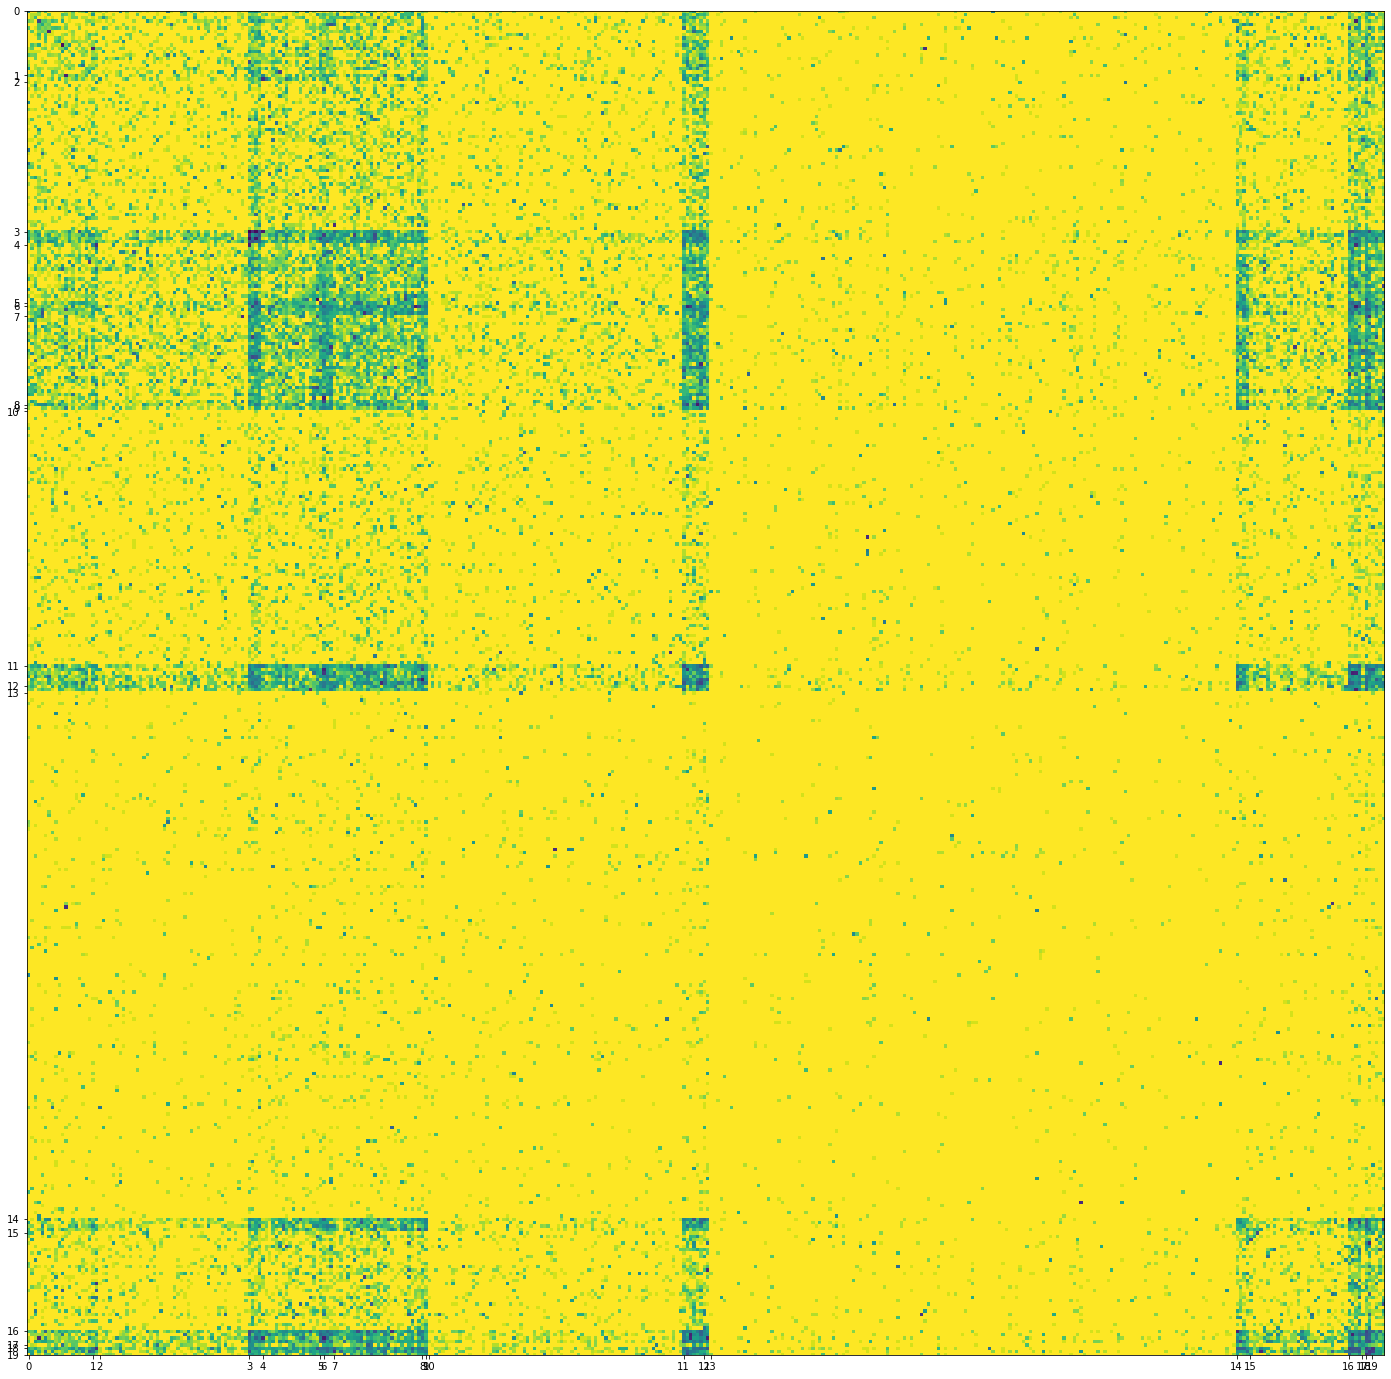

In [180]:
x_label = kmeans.predict(X)
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
t = para_table_log[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t)
_ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5bf6d3470>]],
      dtype=object)

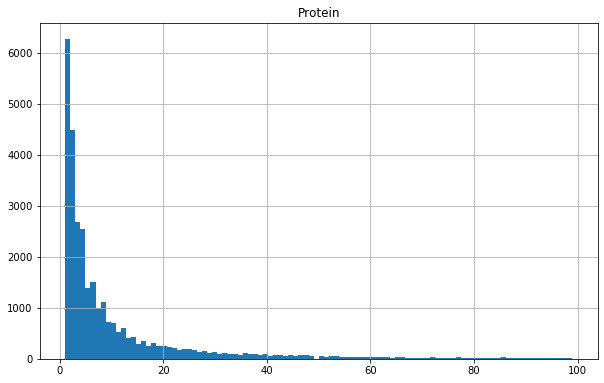

In [14]:
b.query("Protein < 100").hist("Protein", bins=100)

In [11]:
para_table.sum() / (400*400)

1.9253125

# Add 2 to all, preventing log(0).

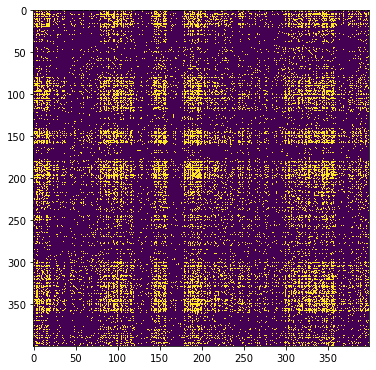

In [10]:
plt.imshow(para_table>0)

In [15]:
para_table_new = para_table + 2

# -log(prob) to get energy

In [19]:
para_table_log = -np.log(para_table_new)

In [21]:
para_table_log.shape

(400, 400)

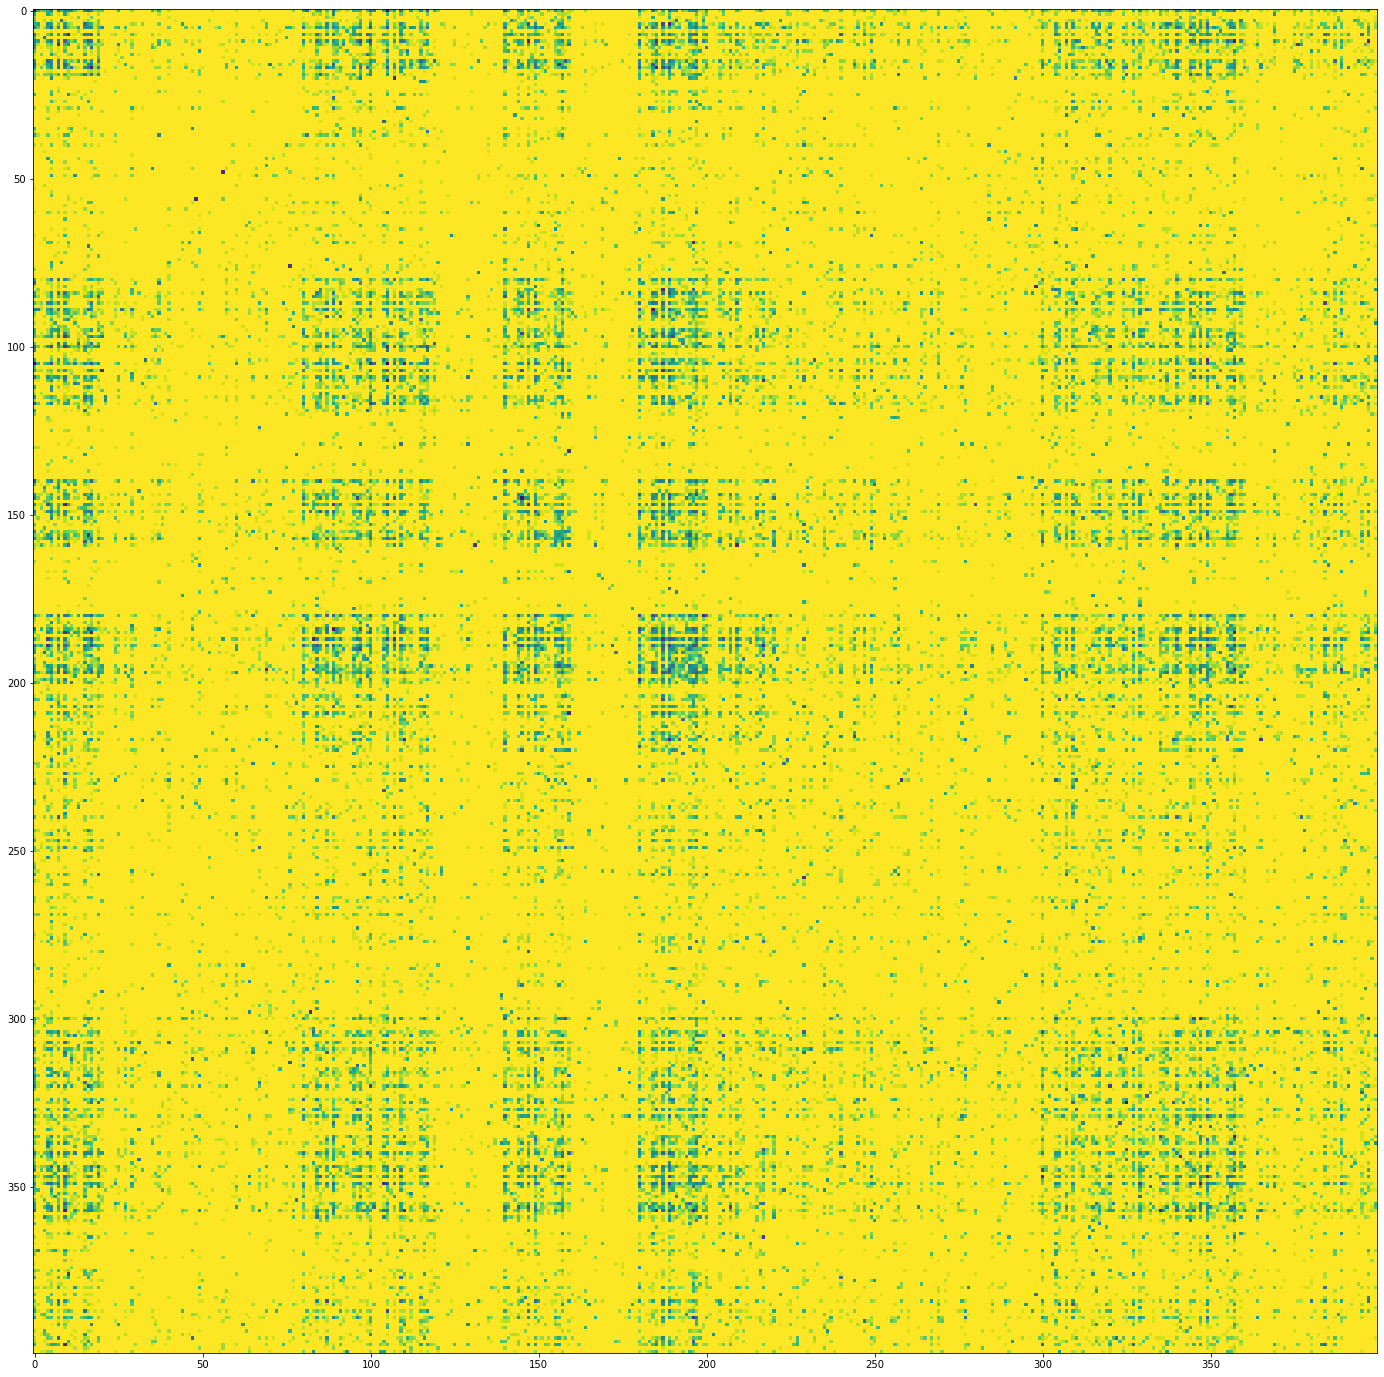

In [101]:
plt.imshow(para_table_log)

# 400 data point, each data point has 400 dimension.

## start with k means. to 20 groups.

In [23]:

import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [ ]:
kmeans.predict(X)

In [164]:
from sklearn.cluster import KMeans
X = para_table_log
# kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
kmeans = KMeans(n_clusters=20, random_state=123).fit(X)
# kmeans = KMeans(n_clusters=20, random_state=229).fit(X)
x_label = kmeans.predict(X)
para_info["Group"] = x_label

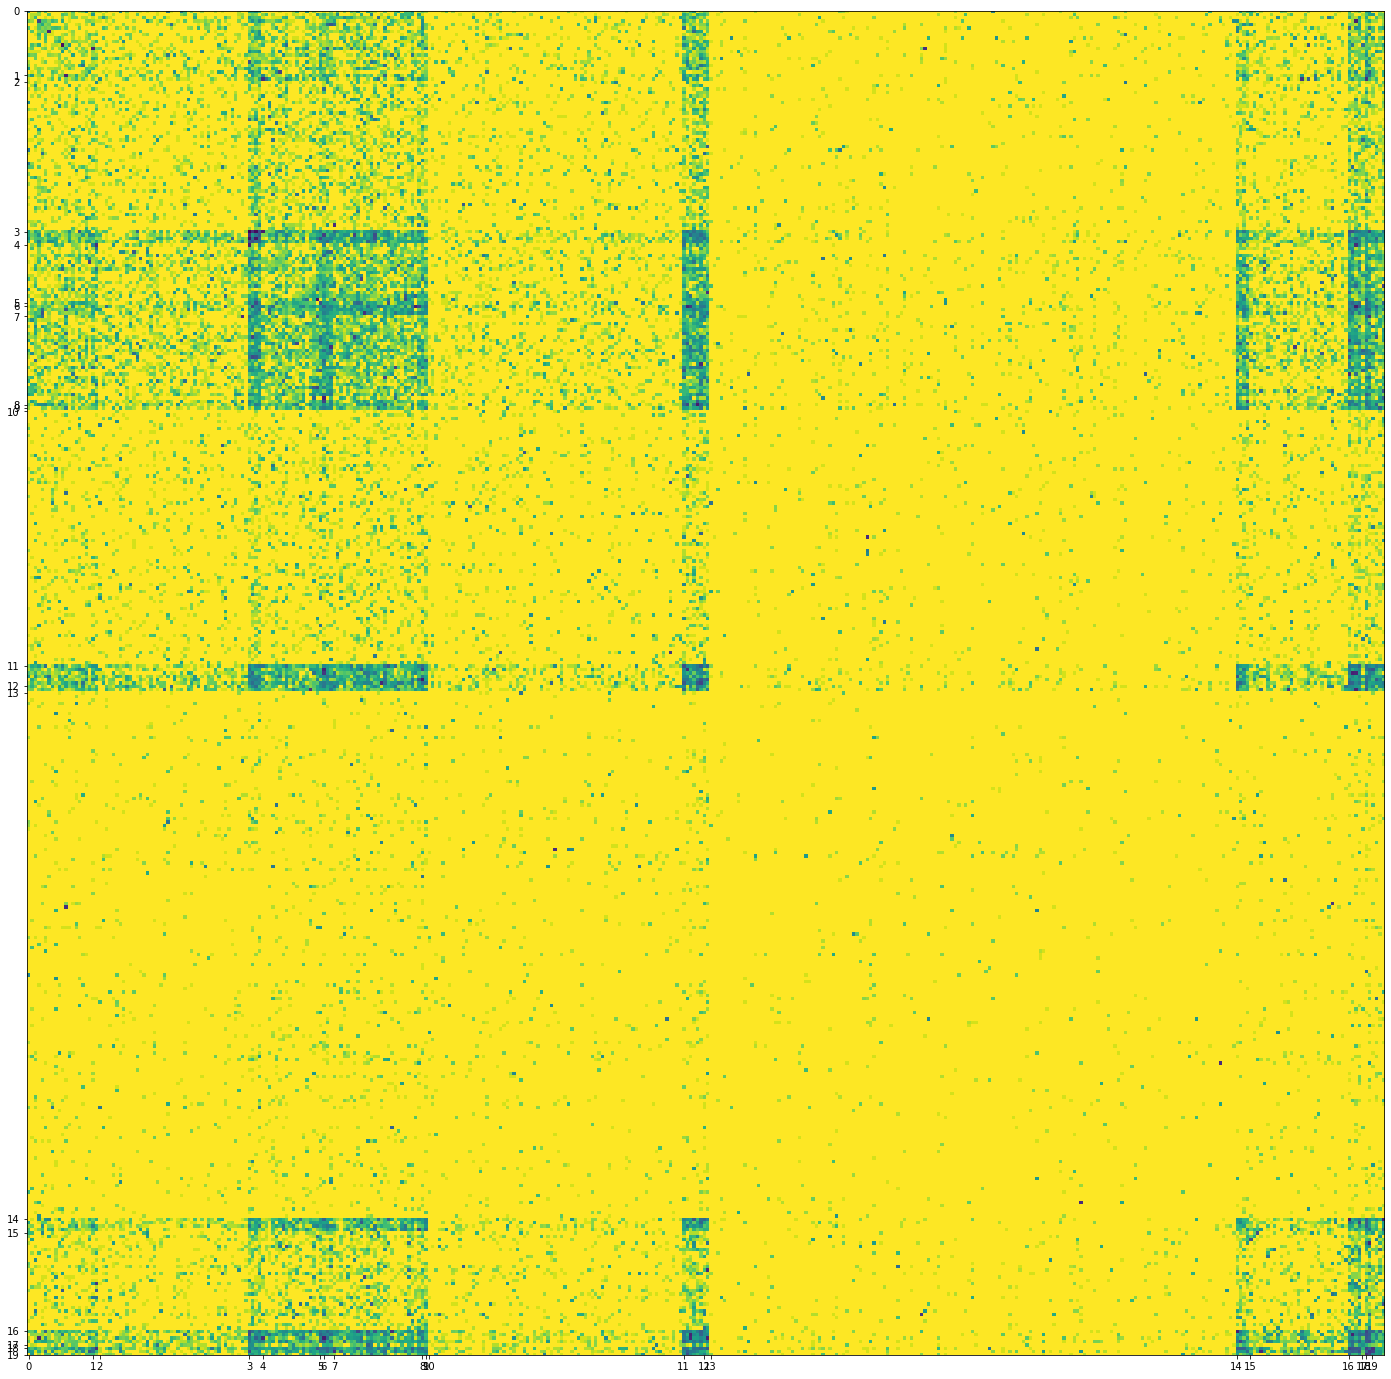

In [165]:

sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
t = para_table_log[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t)
_ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)

In [166]:
para_info["Group"] = x_label

In [181]:
para_info.query("res1=='GLY'")

,index,i,res1,res2,order,Direction,Group
100,11,100,GLY,ALA,4249.0,parallel,3
101,144,101,GLY,CYS,487.0,parallel,2
102,324,102,GLY,ASP,69.0,parallel,13
103,284,103,GLY,GLU,125.0,parallel,13
104,49,104,GLY,PHE,1892.0,parallel,7
105,1,105,GLY,GLY,6447.0,parallel,3
106,244,106,GLY,HIS,189.0,parallel,10
107,31,107,GLY,ILE,2609.0,parallel,7
108,279,108,GLY,LYS,131.0,parallel,13
109,23,109,GLY,LEU,3182.0,parallel,12


In [182]:
para_info["Group"].value_counts()

13    155
10     75
2      44
15     29
7      26
0      19
4      17
11      6
3       4
19      4
14      4
16      4
6       3
18      2
12      2
1       2
8       1
5       1
17      1
9       1
Name: Group, dtype: int64

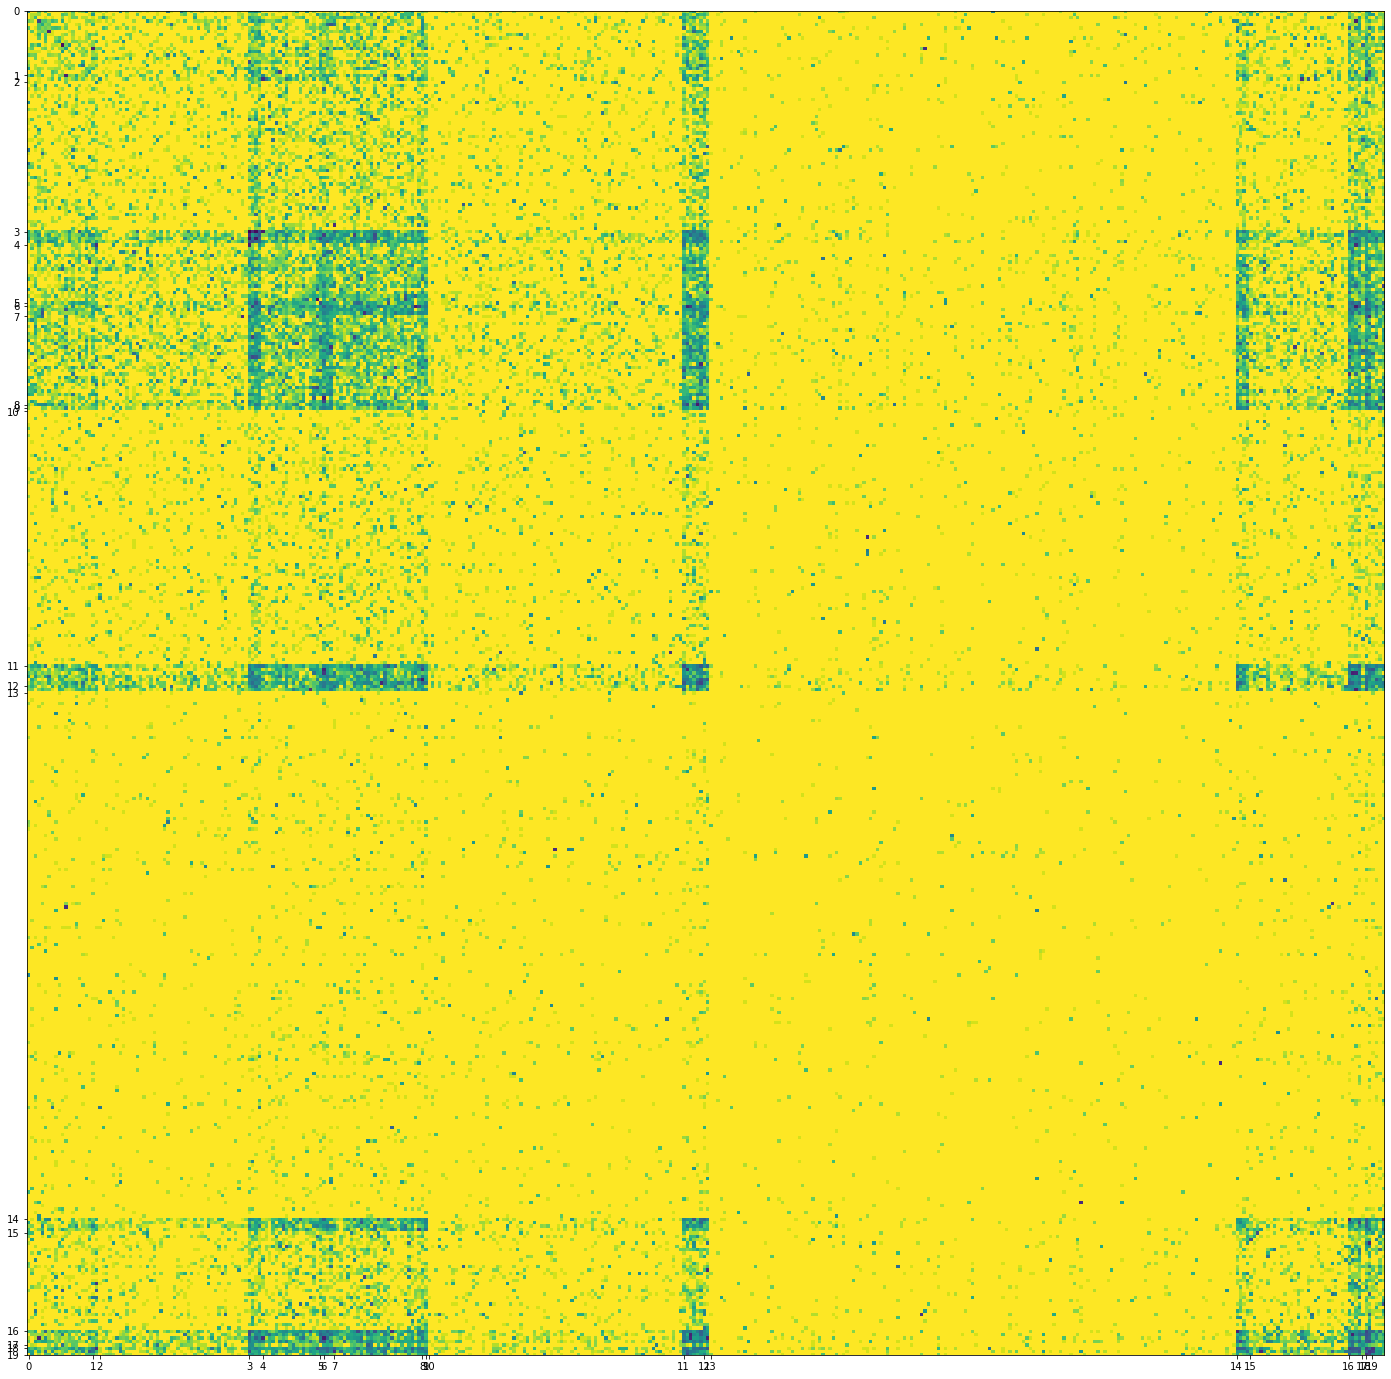

In [109]:
x_label = kmeans.predict(X)
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
t = para_table_log[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t)
_ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)

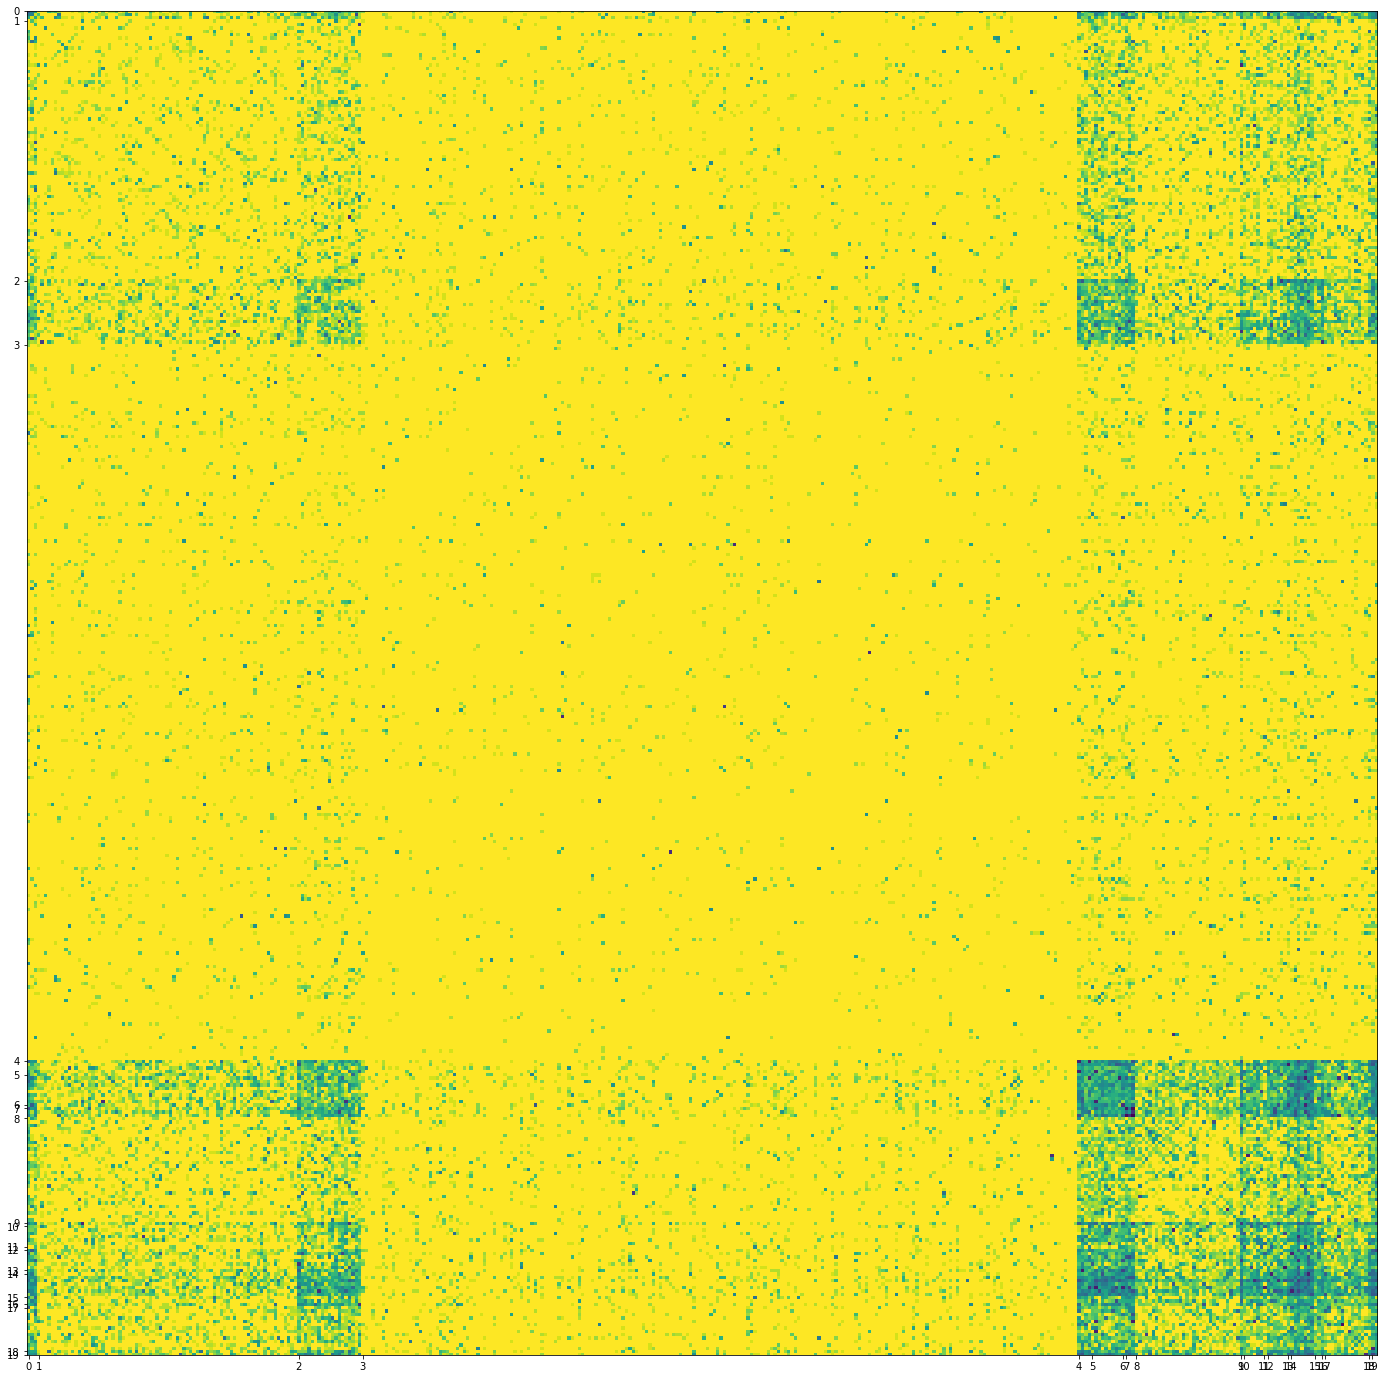

In [100]:
x_label = kmeans.predict(X)
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
t = para_table_log[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t)
_ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)

In [110]:
para_info = para_info.sort_values("i").reset_index(drop=True)

In [111]:
para_info["Group"] = kmeans.predict(X)

In [112]:
para_info.query("res1=='GLY'")

,index,i,res1,res2,order,Direction,Group
100,11,100,GLY,ALA,4249.0,parallel,3
101,144,101,GLY,CYS,487.0,parallel,2
102,324,102,GLY,ASP,69.0,parallel,13
103,284,103,GLY,GLU,125.0,parallel,13
104,49,104,GLY,PHE,1892.0,parallel,7
105,1,105,GLY,GLY,6447.0,parallel,3
106,244,106,GLY,HIS,189.0,parallel,10
107,31,107,GLY,ILE,2609.0,parallel,7
108,279,108,GLY,LYS,131.0,parallel,13
109,23,109,GLY,LEU,3182.0,parallel,12


In [41]:
para_info.query("res1=='GLY'")

,index,i,res1,res2,order,Direction,Group
100,11,100,GLY,ALA,4249.0,parallel,7
101,144,101,GLY,CYS,487.0,parallel,1
102,324,102,GLY,ASP,69.0,parallel,3
103,284,103,GLY,GLU,125.0,parallel,3
104,49,104,GLY,PHE,1892.0,parallel,2
105,1,105,GLY,GLY,6447.0,parallel,7
106,244,106,GLY,HIS,189.0,parallel,3
107,31,107,GLY,ILE,2609.0,parallel,2
108,279,108,GLY,LYS,131.0,parallel,3
109,23,109,GLY,LEU,3182.0,parallel,18


In [46]:
para_info.query("Group==3")

,index,i,res1,res2,order,Direction,Group
2,265,2,ALA,ASP,159.0,parallel,3
6,194,6,ALA,HIS,302.0,parallel,3
8,252,8,ALA,LYS,173.0,parallel,3
14,316,14,ALA,ARG,80.0,parallel,3
21,294,21,CYS,CYS,111.0,parallel,3
...,...,...,...,...,...,...,...
388,287,388,TYR,LYS,120.0,parallel,3
392,281,392,TYR,PRO,131.0,parallel,3
393,236,393,TYR,GLN,204.0,parallel,3
394,246,394,TYR,ARG,186.0,parallel,3


In [50]:
para_info.query("Group==1").sort_values("order")

,index,i,res1,res2,order,Direction,Group
260,240,260,GLN,ALA,197.0,parallel,1
275,230,275,GLN,SER,213.0,parallel,1
86,211,86,PHE,HIS,258.0,parallel,1
57,209,57,ASP,VAL,268.0,parallel,1
24,208,24,CYS,PHE,270.0,parallel,1
...,...,...,...,...,...,...,...
158,99,158,ILE,TRP,828.0,parallel,1
385,98,385,TYR,GLY,849.0,parallel,1
69,97,69,GLU,LEU,850.0,parallel,1
20,91,20,CYS,ALA,896.0,parallel,1


In [51]:
para_info.query("Group!=1 and Group != 3").sort_values("order")

,index,i,res1,res2,order,Direction,Group
330,138,330,THR,MET,509.0,parallel,8
198,119,198,LEU,TRP,646.0,parallel,8
244,118,244,PRO,PHE,658.0,parallel,8
194,115,194,LEU,ARG,681.0,parallel,8
257,114,257,PRO,VAL,696.0,parallel,8
...,...,...,...,...,...,...,...
349,4,349,VAL,LEU,6060.0,parallel,14
187,3,187,LEU,ILE,6197.0,parallel,9
9,2,9,ALA,LEU,6295.0,parallel,14
105,1,105,GLY,GLY,6447.0,parallel,7


In [107]:
para_info.query("res1=='ALA'")

,index,i,res1,res2,order,Direction,Group
0,7,0,ALA,ALA,4977.0,parallel,7
1,173,1,ALA,CYS,380.0,parallel,1
2,265,2,ALA,ASP,159.0,parallel,3
3,125,3,ALA,GLU,570.0,parallel,1
4,28,4,ALA,PHE,2644.0,parallel,12
5,15,5,ALA,GLY,3880.0,parallel,14
6,194,6,ALA,HIS,302.0,parallel,3
7,20,7,ALA,ILE,3368.0,parallel,16
8,252,8,ALA,LYS,173.0,parallel,3
9,2,9,ALA,LEU,6295.0,parallel,14


In [105]:
para_info.query("Group== 7")

,index,i,res1,res2,order,Direction,Group
0,7,0,ALA,ALA,4977.0,parallel,7
100,11,100,GLY,ALA,4249.0,parallel,7
105,1,105,GLY,GLY,6447.0,parallel,7


In [183]:
para_info.query("Group== 3")

,index,i,res1,res2,order,Direction,Group
0,7,0,ALA,ALA,4977.0,parallel,3
5,15,5,ALA,GLY,3880.0,parallel,3
100,11,100,GLY,ALA,4249.0,parallel,3
105,1,105,GLY,GLY,6447.0,parallel,3


In [113]:
para_info["Group"].value_counts()

13    155
10     75
2      44
15     29
7      26
0      19
4      17
11      6
3       4
19      4
14      4
16      4
6       3
18      2
12      2
1       2
8       1
5       1
17      1
9       1
Name: Group, dtype: int64

In [44]:
para_info["Group"].value_counts()

3     212
1      77
8      31
2      19
17     13
5       9
14      7
12      6
10      6
4       4
0       3
7       3
19      2
15      2
6       1
18      1
11      1
13      1
16      1
9       1
Name: Group, dtype: int64

In [154]:
X.shape

(400, 400)

In [155]:
X = para_table_log
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(20, affinity='rbf', n_init=100, random_state=0,
                        assign_labels='discretize')
sc.fit_predict(X)  

NameError: name 'check_array' is not defined

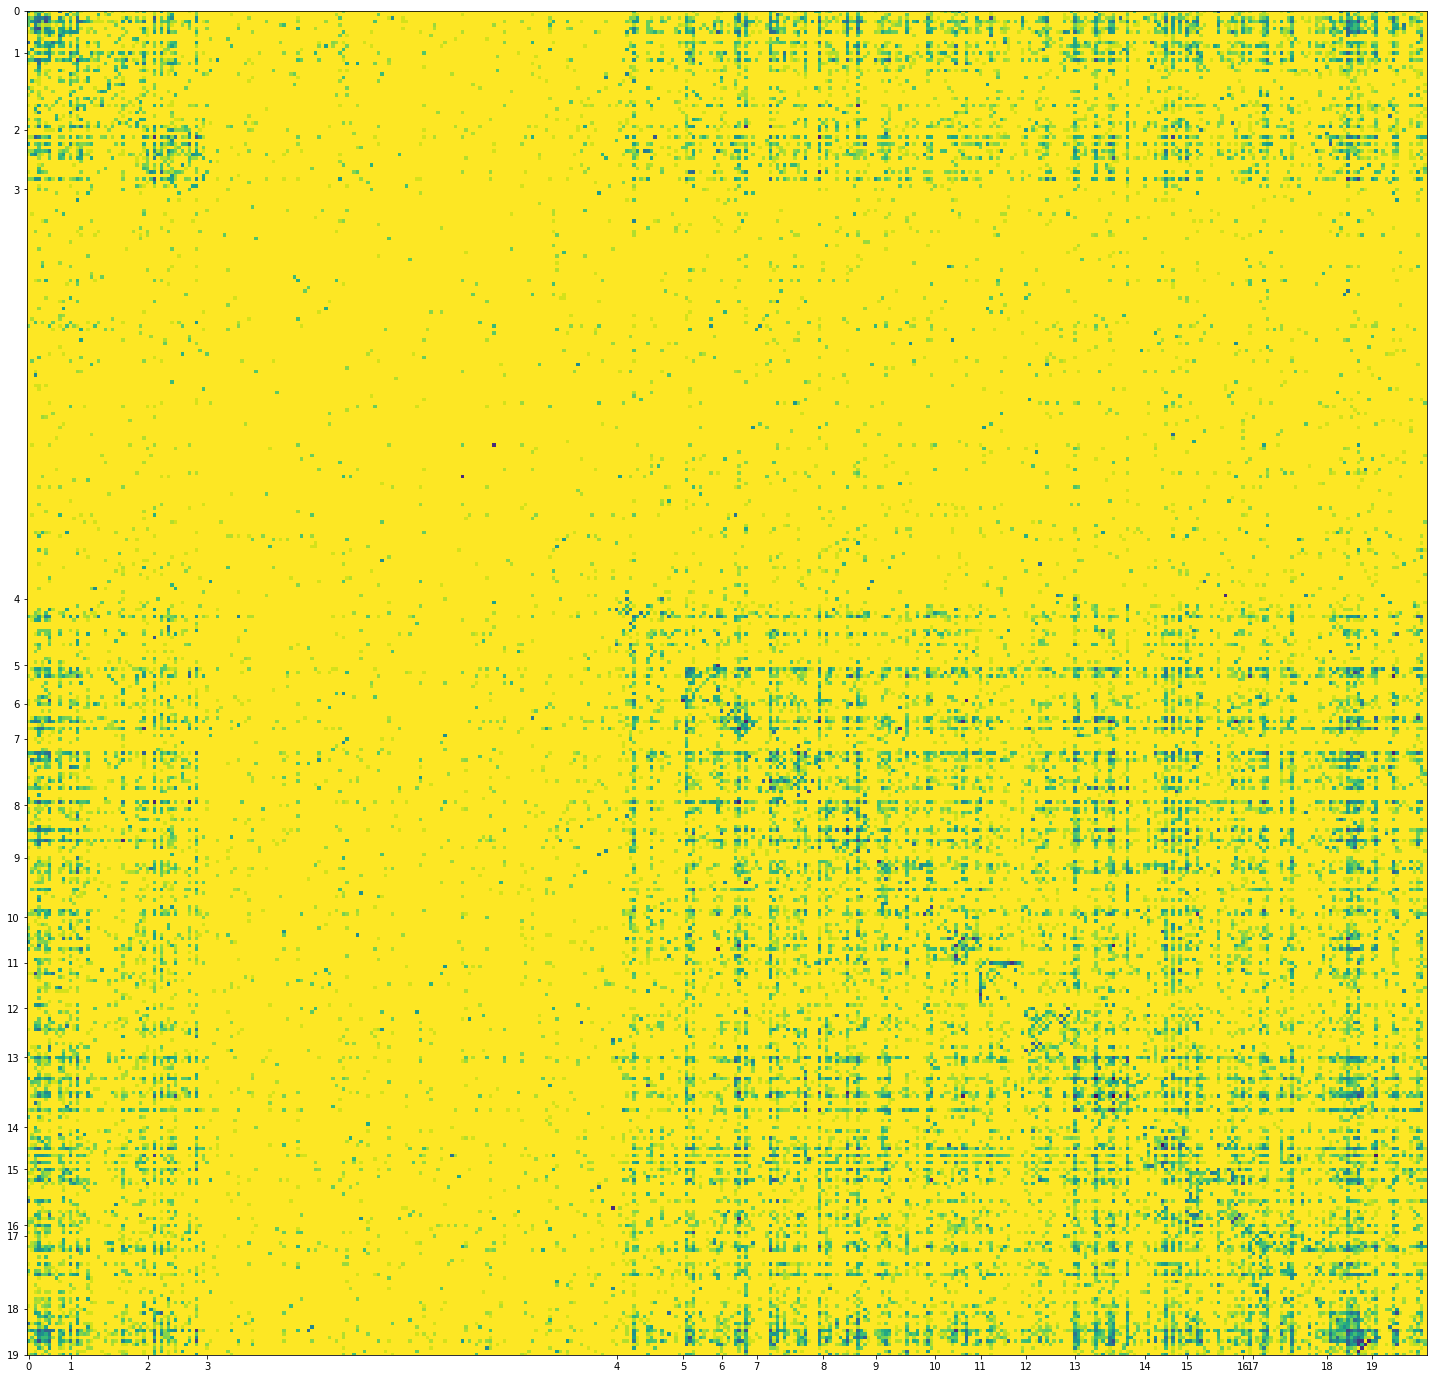

In [127]:
x_label = sc.fit_predict(-X)
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
t = para_table_log[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t)
_ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)

In [128]:
para_info["Group"] = x_label

In [129]:
para_info

,index,i,res1,res2,order,Direction,Group
0,7,0,ALA,ALA,4977.0,parallel,13
1,173,1,ALA,CYS,380.0,parallel,13
2,265,2,ALA,ASP,159.0,parallel,8
3,125,3,ALA,GLU,570.0,parallel,19
4,28,4,ALA,PHE,2644.0,parallel,2
...,...,...,...,...,...,...,...
395,100,395,TYR,SER,820.0,parallel,12
396,150,396,TYR,THR,465.0,parallel,12
397,58,397,TYR,VAL,1656.0,parallel,2
398,325,398,TYR,TRP,69.0,parallel,3


In [130]:
para_info.query("res1=='GLY'")

,index,i,res1,res2,order,Direction,Group
100,11,100,GLY,ALA,4249.0,parallel,13
101,144,101,GLY,CYS,487.0,parallel,13
102,324,102,GLY,ASP,69.0,parallel,3
103,284,103,GLY,GLU,125.0,parallel,9
104,49,104,GLY,PHE,1892.0,parallel,7
105,1,105,GLY,GLY,6447.0,parallel,13
106,244,106,GLY,HIS,189.0,parallel,17
107,31,107,GLY,ILE,2609.0,parallel,18
108,279,108,GLY,LYS,131.0,parallel,3
109,23,109,GLY,LEU,3182.0,parallel,5


In [131]:
para_info["Group"].value_counts()

3     117
1      22
17     21
13     20
7      19
4      19
9      17
2      17
19     16
15     16
8      15
12     14
10     13
18     13
11     13
14     12
0      12
5      11
6      10
16      3
Name: Group, dtype: int64

In [135]:
from sklearn.cluster import AffinityPropagation
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AffinityPropagation().fit(X)
clustering

clustering.labels_

clustering.predict([[0, 0], [4, 4]])

clustering.cluster_centers_



array([[1, 2],
       [4, 2]])

In [145]:
X = para_table_log
clustering = AffinityPropagation().fit(X)

In [146]:
clustering.cluster_centers_.shape

(105, 400)

In [142]:
x_label = clustering.predict(X)
para_info["Group"] = x_label

In [143]:
para_info.query("res1=='GLY'")

,index,i,res1,res2,order,Direction,Group
100,11,100,GLY,ALA,4249.0,parallel,25
101,144,101,GLY,CYS,487.0,parallel,13
102,324,102,GLY,ASP,69.0,parallel,13
103,284,103,GLY,GLU,125.0,parallel,13
104,49,104,GLY,PHE,1892.0,parallel,26
105,1,105,GLY,GLY,6447.0,parallel,27
106,244,106,GLY,HIS,189.0,parallel,13
107,31,107,GLY,ILE,2609.0,parallel,28
108,279,108,GLY,LYS,131.0,parallel,13
109,23,109,GLY,LEU,3182.0,parallel,29


In [144]:
para_info["Group"].value_counts()

13    253
12     44
28      1
29      1
30      1
     ... 
72      1
73      1
74      1
75      1
0       1
Name: Group, Length: 105, dtype: int64

In [147]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

clustering

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [148]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

In [149]:
X

array([[ 1,  2],
       [ 2,  2],
       [ 2,  3],
       [ 8,  7],
       [ 8,  8],
       [25, 80]])